In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [103]:
diabetes_large = pd.read_csv("diabetes.csv")
diabetes_large

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [104]:
# Function 1
def feature_boxplot(feature, BMI = False):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=diabetes_large, x='Diabetes_012', y=feature)
    plt.title(f'Box Plot: {feature} by Diabetes Class')
    # if the feature is BMI, show the threshold for healthy BMI
    if BMI == True:
        plt.axhline(25, color="red", linestyle="--")
        plt.text(x=-0.75,y=22,s='Healthy BMI',color="red",fontsize=10,ha='center',va='bottom')
    plt.show()

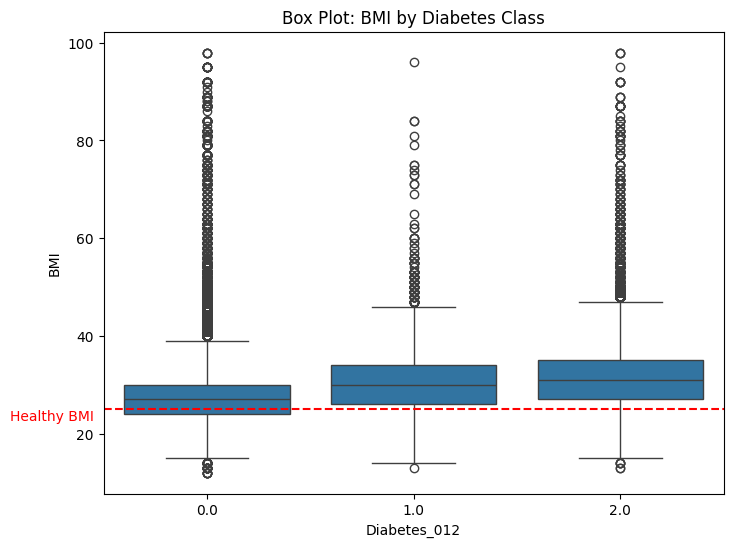

In [105]:
feature_boxplot('BMI', True)

In [106]:
#Shows difference between diabetes and no_diabetes data 
no_diabetes_data = diabetes_large[diabetes_large['Diabetes_012'] == 0]
diabetes_data = diabetes_large[diabetes_large['Diabetes_012'] == 2]
print("Amount of people without Diabetes: "+ str(len(no_diabetes_data)))
print("Amount of people with Diabetes: " + str(len(diabetes_data)))

Amount of people without Diabetes: 213703
Amount of people with Diabetes: 35346


In [107]:
corrs = diabetes_large.corr(method='spearman')
corrs


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271668,0.210668,0.068018,0.235887,0.063040,0.105887,0.178564,-0.121988,-0.042268,...,0.014530,0.037379,0.297138,0.044921,0.161718,0.223567,0.030143,0.186357,-0.126862,-0.172611
HighBP,0.271668,1.000000,0.298199,0.098508,0.243756,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.303300,0.020499,0.149550,0.223618,0.052207,0.344535,-0.141970,-0.179161
HighChol,0.210668,0.298199,1.000000,0.085642,0.136298,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208640,0.044060,0.119331,0.144672,0.031205,0.266355,-0.068850,-0.087905
CholCheck,0.068018,0.098508,0.085642,1.000000,0.040285,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046351,-0.013270,0.030475,0.040585,-0.022115,0.093533,0.003870,0.015263
BMI,0.235887,0.243756,0.136298,0.040285,1.000000,0.023089,0.022428,0.063659,-0.144611,-0.096067,...,-0.013761,0.052151,0.257342,0.053936,0.116096,0.179543,0.089349,-0.024591,-0.123277,-0.092192
Smoker,0.063040,0.096991,0.091299,-0.009929,0.023089,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.159009,0.060940,0.093197,0.122463,0.093662,0.119304,-0.173566,-0.132663
Stroke,0.105887,0.129575,0.092620,0.024158,0.022428,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.163685,0.049819,0.127681,0.176567,0.002978,0.129060,-0.072970,-0.123728
HeartDiseaseorAttack,0.178564,0.209361,0.180765,0.044206,0.063659,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.242243,0.034763,0.156630,0.212709,0.086096,0.227639,-0.095910,-0.141485
PhysActivity,-0.121988,-0.125267,-0.078046,0.004190,-0.144611,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.256241,-0.082526,-0.179494,-0.253174,0.032482,-0.088049,0.200248,0.202022
Fruits,-0.042268,-0.040555,-0.040859,0.023849,-0.096067,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.105474,-0.064153,-0.045278,-0.048352,-0.091175,0.066934,0.114929,0.076415


In [108]:
key_features = ['GenHlth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Age', 'Diabetes_012']
diabetes = diabetes_large[key_features]

In [109]:
no_diabetes = diabetes[diabetes['Diabetes_012'] == 0]
pre_diabetes = diabetes[diabetes['Diabetes_012'] == 1]
yes_diabetes = diabetes[diabetes['Diabetes_012'] == 2]
print("Amount of entries with no diabetes in dataset: " + str(len(no_diabetes)))
print("Amount of entries with prediabetes in dataset: " + str(len(pre_diabetes)))
print("Amount of entries with diabetes in dataset: " + str(len(yes_diabetes)))

Amount of entries with no diabetes in dataset: 213703
Amount of entries with prediabetes in dataset: 4631
Amount of entries with diabetes in dataset: 35346


In [110]:
diabetes

,GenHlth,HighBP,BMI,DiffWalk,HighChol,Age,Diabetes_012
0,5.0,1.0,40.0,1.0,1.0,9.0,0.0
1,3.0,0.0,25.0,0.0,0.0,7.0,0.0
2,5.0,1.0,28.0,1.0,1.0,9.0,0.0
3,2.0,1.0,27.0,0.0,0.0,11.0,0.0
4,2.0,1.0,24.0,0.0,1.0,11.0,0.0
...,...,...,...,...,...,...,...
253675,3.0,1.0,45.0,0.0,1.0,5.0,0.0
253676,4.0,1.0,18.0,1.0,1.0,11.0,2.0
253677,1.0,0.0,28.0,0.0,0.0,2.0,0.0
253678,3.0,1.0,23.0,0.0,0.0,7.0,0.0


In [111]:
# Define the features and target
X = diabetes.drop(columns=["Diabetes_012"])
y = diabetes["Diabetes_012"]

# Apply SMOTE to balance the classes
smote = SMOTE()  # Random state for reproducibility
X_balanced, y_balanced = smote.fit_resample(X, y)

# Combine the balanced features and target into a DataFrame for further use
diabetes_balanced = pd.concat([pd.DataFrame(X_balanced, columns=X.columns), pd.Series(y_balanced, name="Diabetes_012")], axis=1)

# Verify the new class distribution
print("Class distribution after SMOTE:")
print(diabetes_balanced["Diabetes_012"].value_counts())

Class distribution after SMOTE:
Diabetes_012
0.0    213703
2.0    213703
1.0    213703
Name: count, dtype: int64


In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42
)

X_train.shape

(512887, 6)

Score on train: 0.7899244862903525
Score on test: 0.7616399681801875


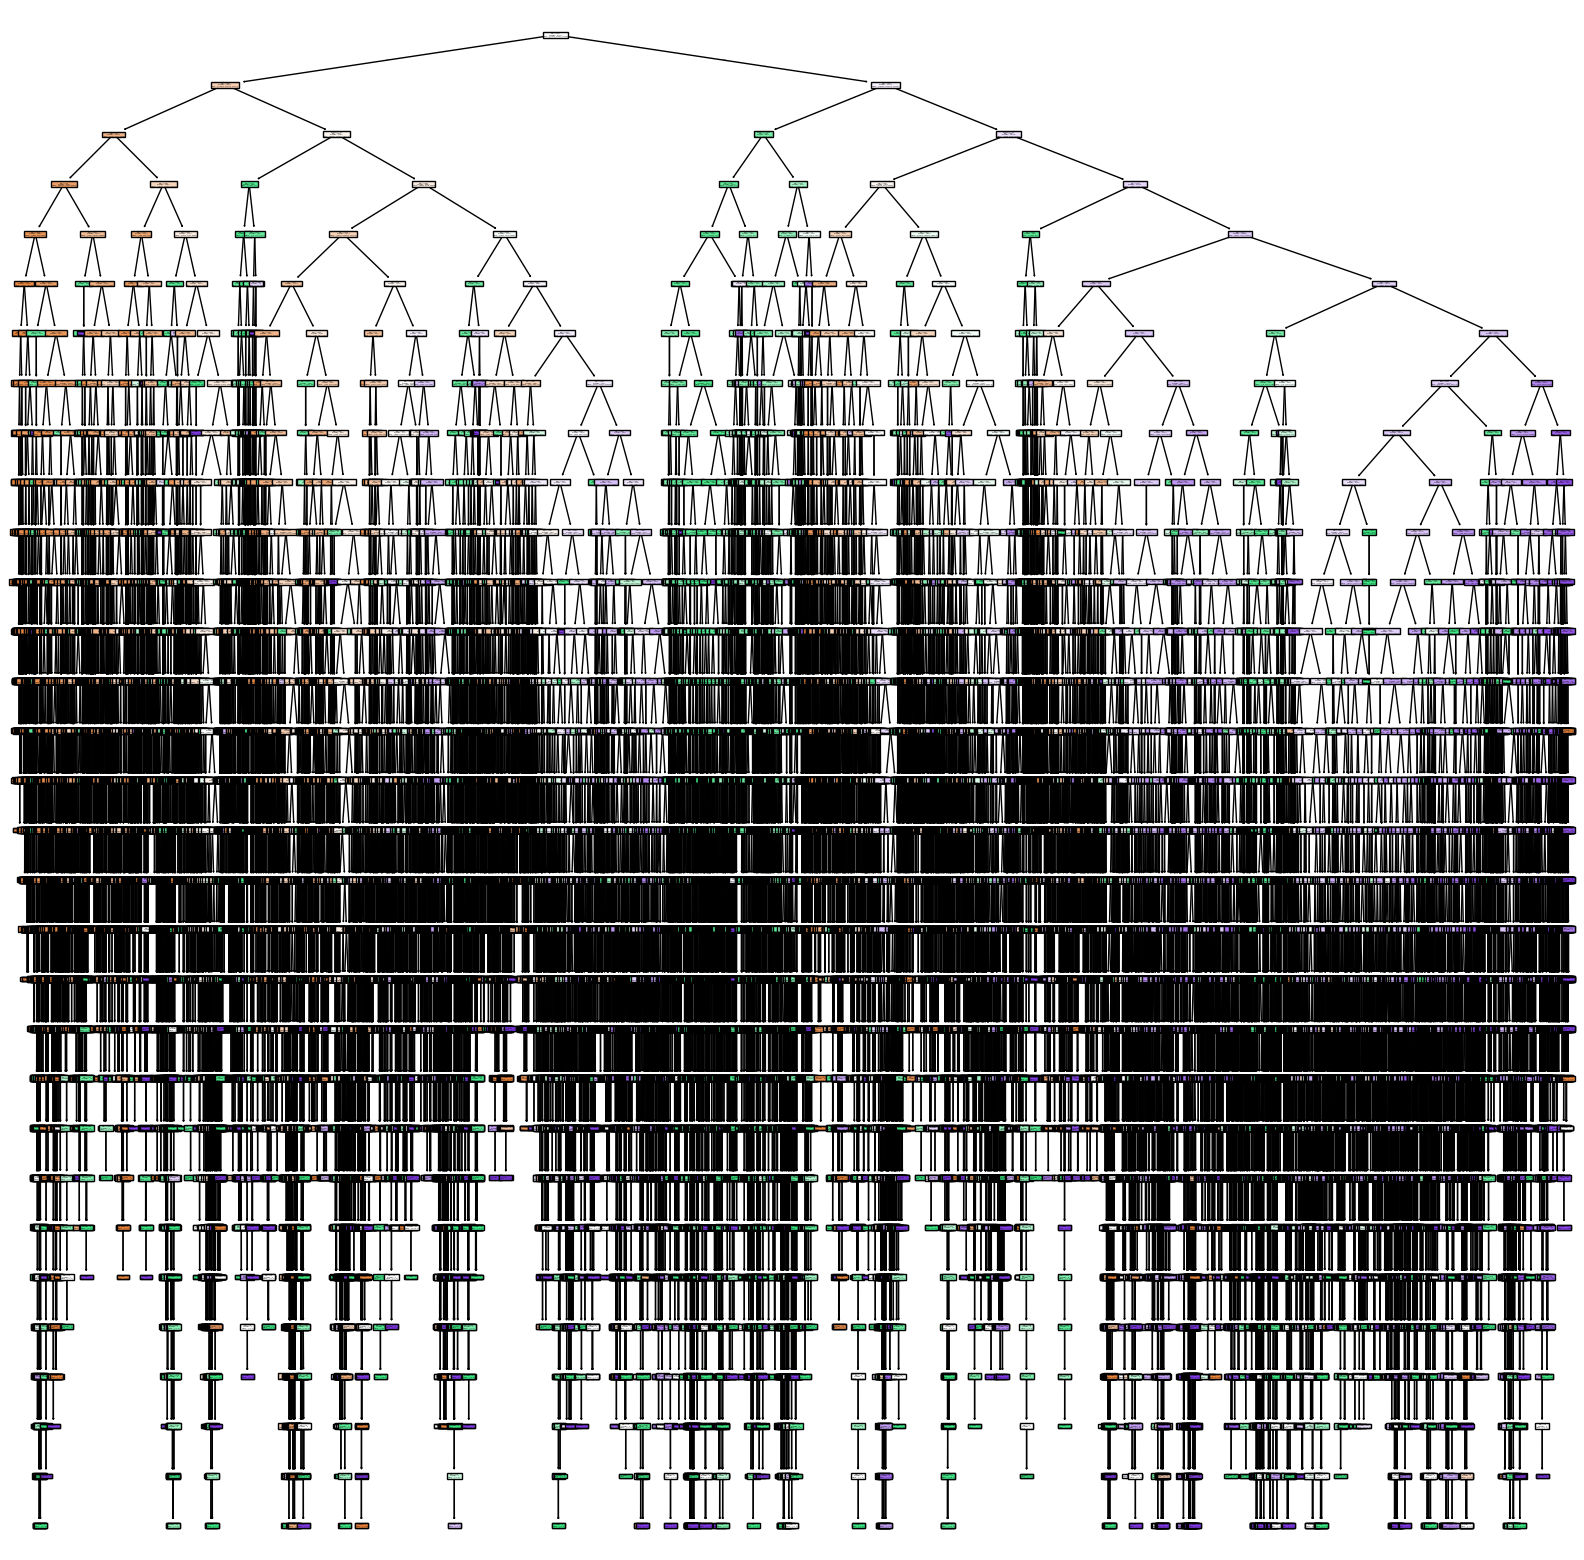

In [124]:

T = DecisionTreeClassifier(max_depth=30)
T.fit(X_train, y_train)
train_score = T.score(X_train, y_train)
test_score = T.score(X_test, y_test)
print('Score on train:', train_score)
print('Score on test:', test_score)

fig, ax = plt.subplots(1, figsize = (20, 20))
p = plot_tree(T, filled = True, feature_names = X_train.columns)


In [120]:
from sklearn.metrics import confusion_matrix

y_test_pred = T.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred, labels=[2, 0])

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)  
FPR = FP / (FP + TN)  
FNR = FN / (FN + TP)
precision = TP / (TP + FP)

print("Confusion Matrix:")
print(cm)
print("True Positive Rate (TPR): " + str(TPR))
print("False Positive Rate (FPR): " + str(FPR))
print("False Negative Rate (FNR): " + str(FNR))
print("Precision: " + str(precision))


Confusion Matrix:
[[31136  6794]
 [ 8300 31516]]
True Positive Rate (TPR): 0.8208805694700765
False Positive Rate (FPR): 0.20845891099055655
False Negative Rate (FNR): 0.17911943052992355
Precision: 0.7895324069378233


Text(50.7222222222222, 0.5, 'True Label')

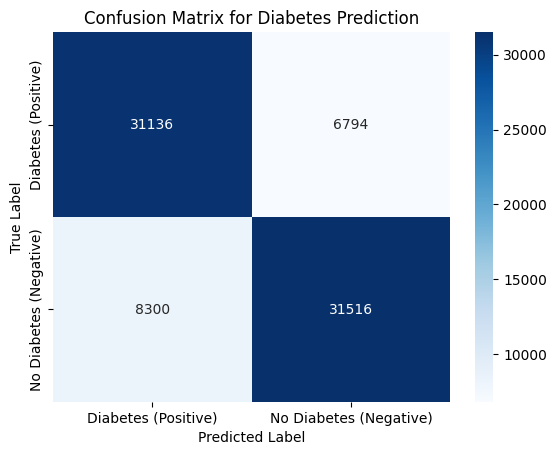

In [121]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
plt.title('Confusion Matrix for Diabetes Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')


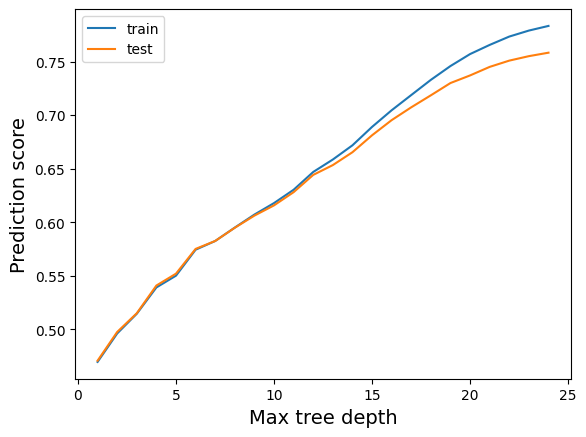

In [122]:
train_scores=[]
test_scores=[]
r=range(1,25)
for i in r:
    T = DecisionTreeClassifier(max_depth=i) 
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))
fig, ax = plt.subplots(1)
sns.lineplot(x=r,y=train_scores,label='train')
sns.lineplot(x=r,y=test_scores,label='test')
ax.set_ylabel('Prediction score', fontsize=14)
ax.set_xlabel('Max tree depth', fontsize=14)
ax.legend()

In [117]:
T = DecisionTreeClassifier(max_depth=30)
T.fit(X_train, y_train)
train_score = T.score(X_train, y_train)
test_score = T.score(X_test, y_test)
print('Score on train:', train_score)
print('Score on test:', test_score)

Score on train: 0.7899225365431372
Score on test: 0.7616945609957729


In [123]:
import joblib
joblib.dump(T, 'diabetes_model.pkl')


['diabetes_model.pkl']